In [1]:
import pandas as pd
import numpy as np
import matplotlib as mat

In [2]:
rawData=pd.read_csv(r'Temperature_And_Precipitation_Cities_IN\Mumbai_1990_2022_Santacruz.csv')
#Importing the CSV File which is in the same folder

In [3]:
print(rawData.shape) #It has 11,894 rows and 5 columns

(11894, 5)


In [4]:
print(rawData.head())

         time  tavg  tmin  tmax  prcp
0  01-01-1990  23.2  17.0   NaN   0.0
1  02-01-1990  22.2  16.5  29.9   0.0
2  03-01-1990  21.8  16.3  30.7   0.0
3  04-01-1990  25.4  17.9  31.8   0.0
4  05-01-1990  26.5  19.3  33.7   0.0


In [5]:
rawData.isna().sum() #Seeing how many null values (Missing Values) are there for each column

time       0
tavg      11
tmin    2454
tmax    1907
prcp    4681
dtype: int64

In [6]:
# Since 'Average Temperature' Column has the least number of Missing Values
# We will only consider it for making the prediction model
avgTemp = rawData[['time','tavg']]

In [7]:
#Thus we now have a new Dataframe called "AvgTemp"
#Now we will drop the remaining 11 null values of this new Dataframe
avgTemp=avgTemp.dropna()

In [8]:
avgTemp['time'] = pd.to_datetime(avgTemp['time'],dayfirst=True)

In [9]:
#Now the Dataframe is ready for model-building: 
avgTemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11883 entries, 0 to 11893
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    11883 non-null  datetime64[ns]
 1   tavg    11883 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 278.5 KB


In [10]:
print(avgTemp)

            time  tavg
0     1990-01-01  23.2
1     1990-01-02  22.2
2     1990-01-03  21.8
3     1990-01-04  25.4
4     1990-01-05  26.5
...          ...   ...
11889 2022-07-21  27.6
11890 2022-07-22  28.3
11891 2022-07-23  28.2
11892 2022-07-24  28.1
11893 2022-07-25  28.3

[11883 rows x 2 columns]


In [11]:
# Making some basic Statistical central tendency measures for this Data
print("Maximum Average temperature: "+str(max(avgTemp['tavg']))+"°C\n")
print("Minimum Average temperature: "+str(min(avgTemp['tavg']))+"°C\n")

avgOfavgTemp = sum(avgTemp['tavg'])/len(avgTemp['tavg'])
median = avgTemp['tavg'].median()

print("Mean Average temperature: "+"{:.2f}".format(avgOfavgTemp)+"°C\n")
print("Median Average temperature: "+"{:.2f}".format(median)+"°C\n")


Maximum Average temperature: 33.7°C

Minimum Average temperature: 17.7°C

Mean Average temperature: 27.76°C

Median Average temperature: 28.10°C



<AxesSubplot:xlabel='Time', ylabel='Temperature in °C'>

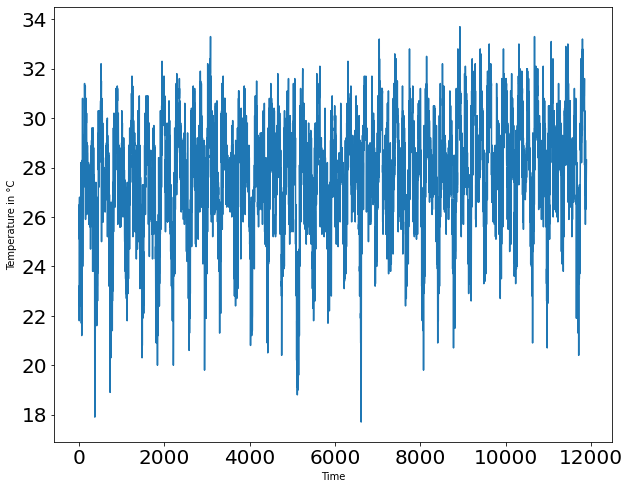

In [12]:
#Plotting the Data
avgTemp['tavg'].plot(ylabel="Temperature in °C", xlabel="Time",figsize=(10,8),fontsize=20) 

<AxesSubplot:xlabel='Time', ylabel='Temperature in °C'>

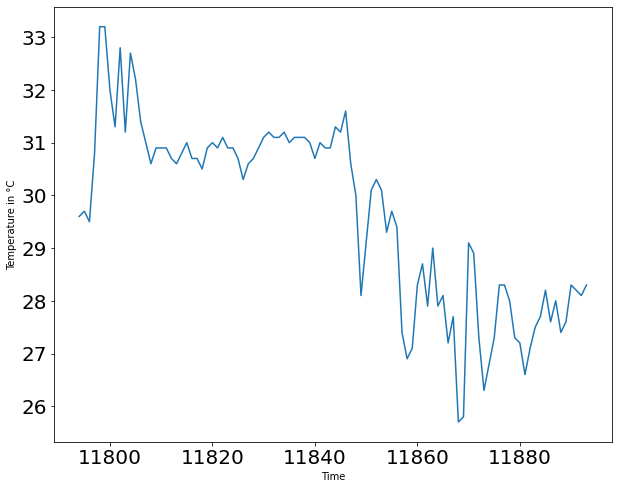

In [13]:
#plotting more recent values: 
avgTemp['tavg'][11783:].plot(ylabel="Temperature in °C", xlabel="Time",figsize=(10,8),fontsize=20)

In [14]:
#Splitting the dataset into train and test:- 
#Ratio:  80% for Training & 20% for Testing
xTrain=avgTemp['time'][ :8318]
yTrain=avgTemp['tavg'][ :8318]

xTest=avgTemp['time'][8319: ]
yTest=avgTemp['tavg'][8319: ]